In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.pandas.read_csv("data/gesell.csv", sep=',')
df

,age,score
0,15,95
1,26,71
2,10,83
3,9,91
4,15,102
5,20,87
6,18,93
7,11,100
8,8,104
9,20,94


In [3]:
X = df['age'].values
Y = df['score'].values

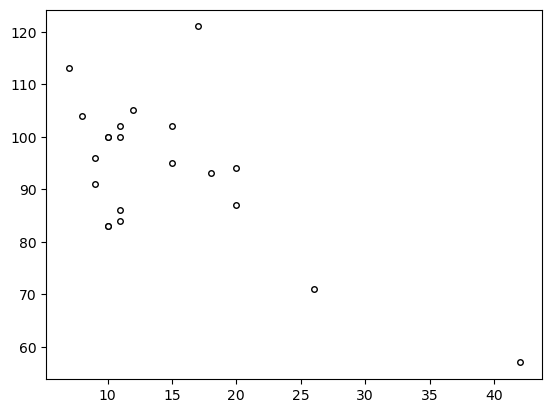

In [4]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.show()

In [8]:
from mltools.estimators import LinearLS
from mltools.scores import modified_zscore

In [9]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(np.asarray(mod_ls.param))

[109.87384059  -1.12698891]


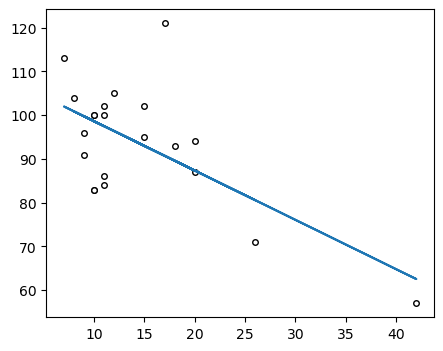

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

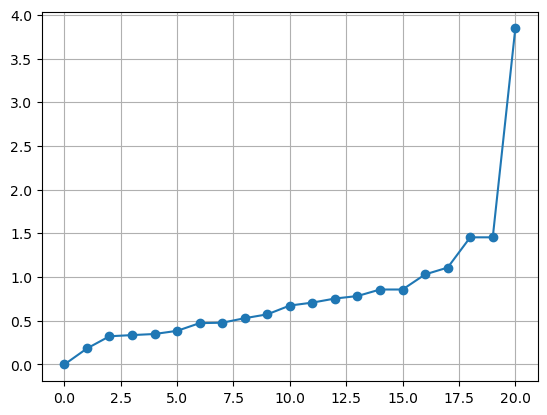

In [11]:
E = abs(mod_ls.evaluate(X[:,None]) - Y)
Z = modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

In [12]:
X1 = X[abs(Z) < 3.5]
Y1 = Y[abs(Z) < 3.5]

In [13]:
regr_ls1 = LinearLS()
regr_ls1.fit(X1[:,None], Y1)
mod_ls1 = regr_ls1.model
print(np.asarray(mod_ls1.param))

[109.30467848  -1.19331077]


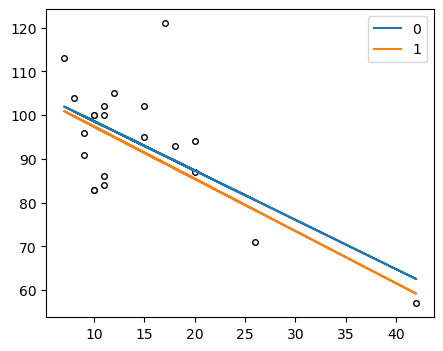

In [14]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]), label='0')
plt.plot(X, mod_ls1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

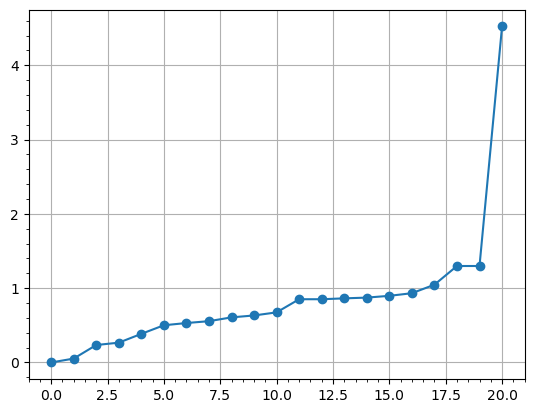

In [22]:
E1 = abs(mod_ls1.evaluate(X[:,None]) - Y)
Z1 = modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

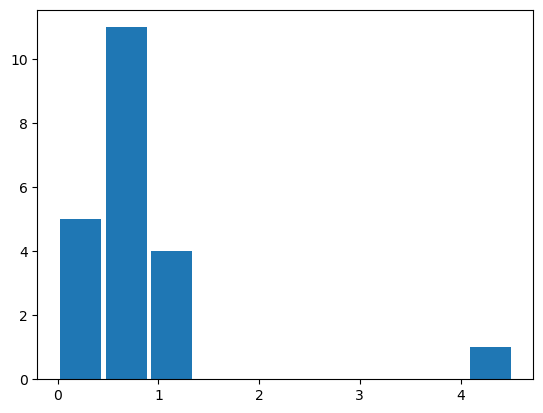

In [24]:
plt.hist(abs(Z1), bins=10, rwidth=0.9)
plt.show()